# 統計PTT每日

In [1]:
# -*- coding: utf-8 -*-
#https://plot.ly/python/ipython-notebook-tutorial/
# pip install plotly
# conda install -c anaconda nbformat
# conda install -c conda-forge nbformat

import pymongo as mg
import datetime
import plotly
from datetime import datetime, timedelta

%config IPCompleter.greedy=True

#ECHO ptt Start ====================================
fetchdays = 1
yesterday_temp = datetime.now() - timedelta(days = fetchdays)
yesterday_date = yesterday_temp.strftime("%Y-%m-%d")
today_date = datetime.now().strftime("%Y-%m-%d")
ary1 = str(yesterday_date).split("-")
start = datetime(int(ary1[0]),int(ary1[1]),int(ary1[2]), 0, 0, 0)
ary1 = str(today_date).split("-")
end =  datetime(int(ary1[0]),int(ary1[1]),int(ary1[2]), 23, 59, 59)
#debug
start = datetime(2020, 10, 8, 0, 0, 0)
end = datetime(2020, 11, 15, 23, 59, 59)
client = mg.MongoClient('127.0.0.1:27017')
db = client["ptt"]
col = db['Gossiping']
sort = [("date", -1)]
result = col.find({"date":{'$gte': start, '$lte': end}})
#result = col.find({"date":{'$gte': start, '$lte': end}}).limit(100)
#result = col.find({"date":{'$gte': start, '$lte': end}}).sort(sort).limit(100)
# result = col.find({"date":{'$gte': start, '$lte': end}})
# result = col.find({"url":"https://www.ptt.cc/bbs/Gossiping/M.1507319547.A.8CF.html","date":{'$gte': start, '$lte': end} })
result  =  list(result)
#ECHO ptt End ====================================


#Own ptt Start ====================================
# client = mg.MongoClient('127.0.0.1:27017')
# db = client['ptt'] #DBName: ptt
# start = datetime(2017, 9, 14, 0, 0, 0)
# end = datetime(2017, 9, 19, 23, 59, 59)
# result = db['Gossiping'].find({ 'date':{'$gte':start,'$lte':end } })
# result  =  list(result)
#Own ptt End ====================================

temp_dict = {}
date_dict = {}
for x in result:
    temp_dict[ x['url'] ] = x

print ("distinct %s records found." % (len(temp_dict) ) )

post_dict = {}
post_counter = 0
last_sum = 0
for x in temp_dict:
    last_sum = 0
    post_counter = 0
    dt = temp_dict[x]["date"].strftime("%Y-%m-%d")
    try:
        last_sum = post_dict[dt]['counter']
        post_dict[dt]={'counter':last_sum+1}
    except Exception as e:
        post_counter = post_counter+1
        post_dict[dt]={'counter':post_counter}
        pass

x_axis = []
y_axis = []
for x in post_dict:
    x_axis.append(x)
    y_axis.append(post_dict[x]['counter'])

zipped = zip(x_axis, y_axis)
x_axis = []
y_axis = []
zipped = sorted(zipped, key=lambda x: x[0])
for x in zipped:
    x_axis.append(x[0])
    y_axis.append(x[1])
print(x_axis)
print(y_axis)

distinct 13917 records found.
['2020-10-11', '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18']
[1158, 2114, 2129, 2047, 2009, 1921, 1787, 752]


In [2]:
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
        "data": [{
                "x": x_axis,
                "y": y_axis
            }],
        "layout": {
            "title": "David PTT 八卦版每日發文數統計"
        }
    })

In [3]:
tmp_score = 0
lastSumScore = 0
for x in temp_dict:
    dt = temp_dict[x]["date"].strftime("%Y-%m-%d")
    #print(dt)
    try:
        #print(temp_dict[x]['comments'])
        score = 0
        for y in list(temp_dict[x]['comments']):
            try:
                lastSumScore = date_dict[dt]['score']
                score = lastSumScore+y['score']
                date_dict[dt]={'date':dt,'score':score}
            except Exception as e:
                score = y['score']
                date_dict[dt]={'date':dt,'score':score}
                pass
    except Exception as e:
        #print('Exception:'+str(e))
        pass
#print(date_dict)
x_axis = []
y_axis = []
for x in date_dict:
    x_axis.append(x)
    y_axis.append(date_dict[x]['score'])

zipped = zip(x_axis, y_axis)
x_axis = []
y_axis = []
zipped = sorted(zipped, key=lambda x: x[0])
for x in zipped:
    x_axis.append(x[0])
    y_axis.append(x[1])
print(x_axis)
print(y_axis)

['2020-10-11', '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18']
[10374, 25669, 25864, 23686, 25479, 21256, 17633, 5937]


In [4]:
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
        "data": [{
                "x": x_axis,
                "y": y_axis
            }],
        "layout": {
            "title": "David PTT 八卦版每日互動(推-噓)觀察"
        }
    })


## Visualization

In [5]:
result[:1]

[{'_id': ObjectId('5f8bd8c38bdfe07591032ee9'),
  'board': 'Gossiping',
  'title': '[新聞]台灣還配被評自由度滿級分嗎',
  'author': 'YusaAoi',
  'content': '\n1.媒體來源:chinatimes\n\n2.記者署名黃福其\n\n3.完整新聞標題:台灣還配被評自由度滿級分嗎\n\n4.完整新聞內文:國民黨立委賴士葆昨指出，去年台灣媒體得到國際非政府人權組織CIVICUS評鑑為「自由度滿級分」，台灣獲評為全亞洲公民活動自由度唯一開放的國家，如今NCC破天荒要召開中天新聞台換照聽證會，輿論甚囂塵上指將換成親綠媒體，如果成真，台灣媒體還配得上自由度滿級分的稱譽嗎？號稱追求民主自由人權的台灣要如何面對國際社會？\n\n賴士葆說，CIVICUS的報告指出，政府侵犯公民活動空間最主要的手段，就是「審查制度封鎖新聞媒體及社群媒體」。但蔡政府全面執政後卻讓台灣新聞和言論自由進入轉彎倒退的拐點。\n\n賴士葆指出，台灣號稱多元，卻容不下一個政治立場相左的新聞媒體，對照香港蘋果日報創辦人黎智英被捕後，引起國際關切並撻伐中國大陸戕害新聞自由，黎智英後來被釋放，香港蘋果日報並沒被關閉，蔡政府為何讓新聞自由倒退像極權國家？\n\n賴強調，蔡政府或以為這次高票當選得到人民的空白授權，但不要忘記應當存在不同立場的媒體，以代表台灣沒有投蔡約6百萬人的聲音。蔡要想想，川普上台後有把CNN和紐時關閉嗎？\n\n5.完整新聞連結 (或短網址):\n',
  'date': datetime.datetime(2020, 10, 18, 13, 54, 16),
  'ip': '5.252.161.27',
  'locale': '(英國)',
  'comments': [],
  'score': 0,
  'url': 'https://www.ptt.cc/bbs/Gossiping/M.1603000458.A.882.html',
  'updatetime': datetime.datetime(2020, 10, 18, 13, 55, 15, 338000)}]

In [6]:
import pandas as pd

df = pd.DataFrame(result)
df.head(1)

,_id,board,title,author,content,date,ip,locale,comments,score,url,updatetime
0,5f8bd8c38bdfe07591032ee9,Gossiping,[新聞]台灣還配被評自由度滿級分嗎,YusaAoi,\n1.媒體來源:chinatimes\n\n2.記者署名黃福其\n\n3.完整新聞標題:台...,2020-10-18 13:54:16,5.252.161.27,(英國),[],0,https://www.ptt.cc/bbs/Gossiping/M.1603000458....,2020-10-18 13:55:15.338


In [7]:
from datetime import datetime as dt

def weekday(posts):
    weekdays = []
    for post in posts:
        weekdays.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").weekday()+1)
    return weekdays

def hour(posts):
    hours = []
    for post in posts:
        hours.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").hour)
    return hours

def day(posts):
    days = []
    for post in posts:
        days.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").strftime('%Y-%m-%d'))
    return days

In [8]:
df['hour'] = hour(df['date'].astype(str))
df['weekday'] = weekday(df['date'].astype(str))
df['post_date'] = day(df['date'].astype(str))
df.head(1)

,_id,board,title,author,content,date,ip,locale,comments,score,url,updatetime,hour,weekday,post_date
0,5f8bd8c38bdfe07591032ee9,Gossiping,[新聞]台灣還配被評自由度滿級分嗎,YusaAoi,\n1.媒體來源:chinatimes\n\n2.記者署名黃福其\n\n3.完整新聞標題:台...,2020-10-18 13:54:16,5.252.161.27,(英國),[],0,https://www.ptt.cc/bbs/Gossiping/M.1603000458....,2020-10-18 13:55:15.338,13,7,2020-10-18


## 周間、24小時鄉民 發文 的熱度

In [9]:
import matplotlib.pyplot as plt
import json
%matplotlib inline

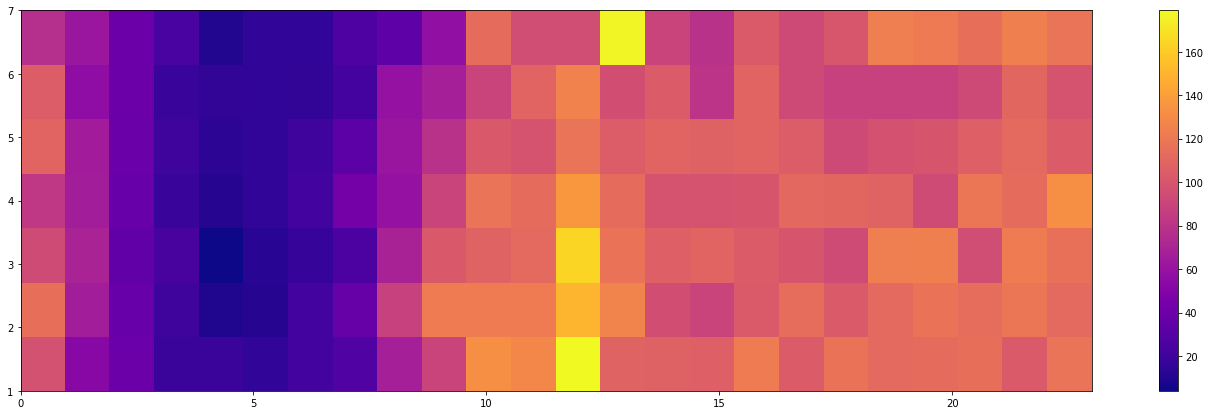

In [10]:
plt.figure(figsize=(24,7))
plt.hist2d(df['hour'], df['weekday'],bins=[24,7], label=['hi','hi'],cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

### scatter by followers count and post count

In [11]:
import json

# display all comments from ptt post
# pd.set_option('display.max_colwidth', -1)

df["reaction"] = df["comments"].apply(lambda x: len(x))
#df["comment_word_count"] = df["comments"].apply(lambda x: len(x))
df.head(1)

,_id,board,title,author,content,date,ip,locale,comments,score,url,updatetime,hour,weekday,post_date,reaction
0,5f8bd8c38bdfe07591032ee9,Gossiping,[新聞]台灣還配被評自由度滿級分嗎,YusaAoi,\n1.媒體來源:chinatimes\n\n2.記者署名黃福其\n\n3.完整新聞標題:台...,2020-10-18 13:54:16,5.252.161.27,(英國),[],0,https://www.ptt.cc/bbs/Gossiping/M.1603000458....,2020-10-18 13:55:15.338,13,7,2020-10-18,0


In [12]:
df["comment_raw"] = df["comments"].apply(lambda x: " ".join([word['content'].strip(': ') for word in x]))
df['comment_length'] = df["comment_raw"].apply(len)
df['comment_avg_length'] = (df["comment_length"]/df["reaction"])
df['comment_avg_length'].fillna(0, inplace=True)
df['comment_avg_length'] = df['comment_avg_length'].astype(int)
df.head(1)

,_id,board,title,author,content,date,ip,locale,comments,score,url,updatetime,hour,weekday,post_date,reaction,comment_raw,comment_length,comment_avg_length
0,5f8bd8c38bdfe07591032ee9,Gossiping,[新聞]台灣還配被評自由度滿級分嗎,YusaAoi,\n1.媒體來源:chinatimes\n\n2.記者署名黃福其\n\n3.完整新聞標題:台...,2020-10-18 13:54:16,5.252.161.27,(英國),[],0,https://www.ptt.cc/bbs/Gossiping/M.1603000458....,2020-10-18 13:55:15.338,13,7,2020-10-18,0,,0,0


In [13]:
df.loc[df['comment_avg_length'] > 20]

,_id,board,title,author,content,date,ip,locale,comments,score,url,updatetime,hour,weekday,post_date,reaction,comment_raw,comment_length,comment_avg_length
57,5f8bd8e68bdfe07591032fd1,Gossiping,Re: [新聞] 英國民調：全球15國唯一！台灣人最挺川普,hyoerious,\n,2020-10-18 13:16:37,106.104.71.120,(臺灣),"[{'user': 'Bestdecision', 'content': ': 你確定要調查...",1,https://www.ptt.cc/bbs/Gossiping/M.1602998199....,2020-10-18 13:55:50.581,13,7,2020-10-18,7,你確定要調查俄羅斯? 親中的俄羅斯肯定挺拜登啊 台灣就東南亞 跟東南亞一區 有什麼問題 這名...,150,21
61,5f8bd8e98bdfe07591032fe1,Gossiping,Re: [新聞] 自知有愛滋風險..他半年檢一次確診中鏢！,k44754,\n,2020-10-18 13:16:00,101.10.110.235,(臺灣),"[{'user': 'girl55665566', 'content': ': 可能有些人不...",0,https://www.ptt.cc/bbs/Gossiping/M.1602998162....,2020-10-18 13:55:53.328,13,7,2020-10-18,11,可能有些人不敢面對事實ㄅ 處女都能懷孕了 哪有什麼風險為0的統計 你說是吧 U=U 血液中驗...,234,21
107,5f8bd9068bdfe0759103309c,Gossiping,Re: [新聞] 後備改革｜立委反對恢復徵兵「回不去了,A6,\n,2020-10-18 12:47:03,101.87.96.8,(中國),"[{'user': 'trylin', 'content': ': 以後還缺兵 就把除役年齡...",1,https://www.ptt.cc/bbs/Gossiping/M.1602996425....,2020-10-18 13:56:22.976,12,7,2020-10-18,3,以後還缺兵 就把除役年齡延到60阿 14天繼續延長就好了，不超過365天都是合理範圍 總統真...,70,23
212,5f8bd9478bdfe07591033246,Gossiping,Re: [問卦] 請問限縮交通違規檢舉進度到哪了？,Brooklyn99,\n,2020-10-18 11:41:32,203.204.64.47,(臺灣),"[{'user': 'stvc', 'content': ': 洨英政績啊 喬一下違法都變...",1,https://www.ptt.cc/bbs/Gossiping/M.1602992494....,2020-10-18 13:57:27.769,11,7,2020-10-18,1,洨英政績啊 喬一下違法都變沒事 超買 農地工廠 呵呵,29,29
249,5f8bd95f8bdfe075910332dd,Gossiping,Re: [問卦] 為何很多天才都跟精神病有掛勾,goodbye,\n,2020-10-18 11:18:42,111.71.12.112,(臺灣),"[{'user': 'minifat', 'content': ': 我去過中國 我不否認他...",0,https://www.ptt.cc/bbs/Gossiping/M.1602991124....,2020-10-18 13:57:51.344,11,7,2020-10-18,1,我去過中國 我不否認他門某些制度 臺灣真的被統一就好了,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,5f8bfb148bdfe075910447f2,Gossiping,Re: [問卦] 為何公設比要做到34%？,l42857,\n建商蓋公設又不是不用錢，\n特別是雨遮這種作弊公設都被砍掉後，\n你以為建商那麼愛蓋公設...,2020-10-11 16:22:31,175.97.23.132,(臺灣),"[{'user': 'leehom309536', 'content': ': 一堆人只會該...",0,https://www.ptt.cc/bbs/Gossiping/M.1602404553....,2020-10-18 16:21:40.048,16,7,2020-10-11,7,一堆人只會該那邊公設比，是市場需求決定產品 好阿，大家都不要買就好惹 公設越多越愛搞有的沒的...,151,21
13722,5f8bfb548bdfe07591044aec,Gossiping,Re: [問卦] 美中開戰時俄羅斯會站在哪個陣營?,chen740530,\n唇亡齒寒\n\n中美大戰開打 戰爭至少會跟中日甲會打一年左右\n\n不會短時間就結束\n...,2020-10-11 15:06:36,27.247.98.173,(臺灣),"[{'user': 'wz70403', 'content': ': 俄羅斯會表面幫中國 背...",4,https://www.ptt.cc/bbs/Gossiping/M.1602399998....,2020-10-18 16:22:44.309,15,7,2020-10-11,49,俄羅斯會表面幫中國 背後捅一刀 沒這麼好，俄羅斯新疆、蒙古、東北都想要 看看ㄧ二次大戰，俄羅...,1046,21
13874,5f8bfbb28bdfe07591044f47,Gossiping,Re: [問卦] 台灣生育率這麼低台女要負多少責任,traman,\n\n\n怪那些把懷孕講得很悲憤的人吧\n\n\n台女說要生小孩 比起台男 省去當兵的苦 ...,2020-10-11 13:32:24,110.28.167.67,(臺灣),"[{'user': 'heat0204', 'content': ': 所以你可以付52萬嗎...",-1,https://www.ptt.cc/bbs/Gossiping/M.1602394346....,2020-10-18 16:24:18.942,13,7,2020-10-11,13,所以你可以付52萬嗎？還不是付300萬 可是廢物台男月子中心錢不出會願意出52萬喔笑死XDD...,292,22
13875,5f8bfbb38bdfe07591044f4b,Gossiping,Re: [問卦] 日男台女比日女台男 離婚率還高！？,sodistrues,\n,2020-10-11 13:32:23,223.136.126.30,(臺灣),"[{'user': 'gomidonnsine', 'content': ': 日本的主婦這...",2,https://www.ptt.cc/bbs/Gossiping/M.1602394345....,2020-10-18 16:24:19.361,13,7,2020-10-11,4,日本的主婦這麼難當，台女怎麼可能勝任 除了超級3次方哈日的台女以外，大部分都比在日台男無法 ...,91,22


In [14]:
groupbyUsermMean = df.groupby('author').mean()

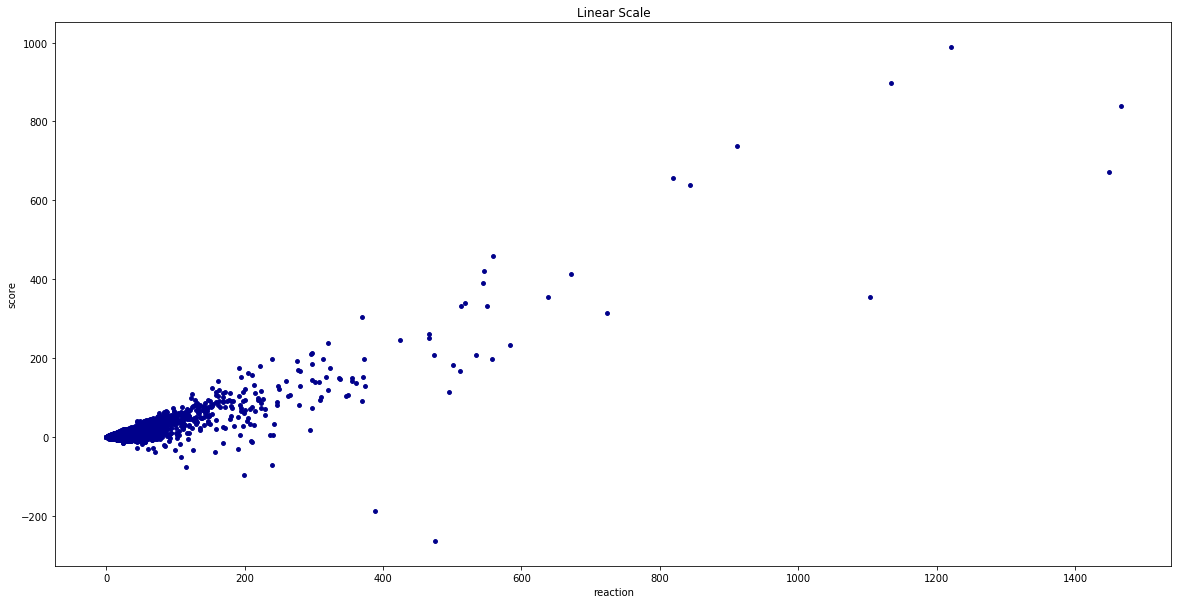

In [15]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyUsermMean.plot.scatter(x='reaction',y='score',c='DarkBlue',ax=ax[1], s=15)
plt.show()

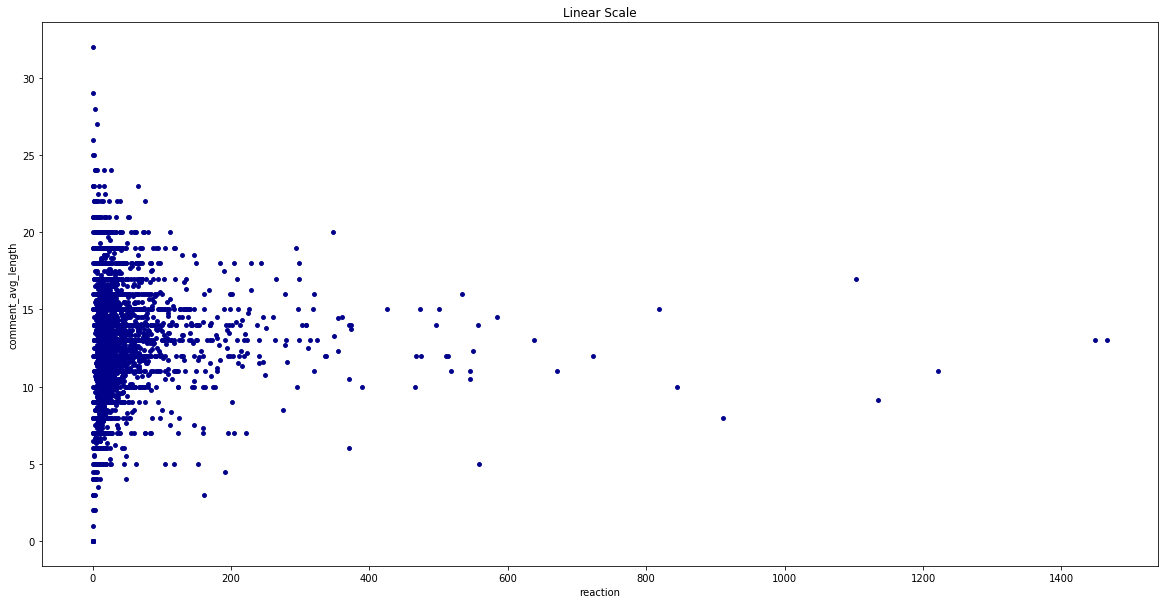

In [16]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyUsermMean.plot.scatter(x='reaction',y='comment_avg_length',c='DarkBlue',ax=ax[1], s=15)
plt.show()

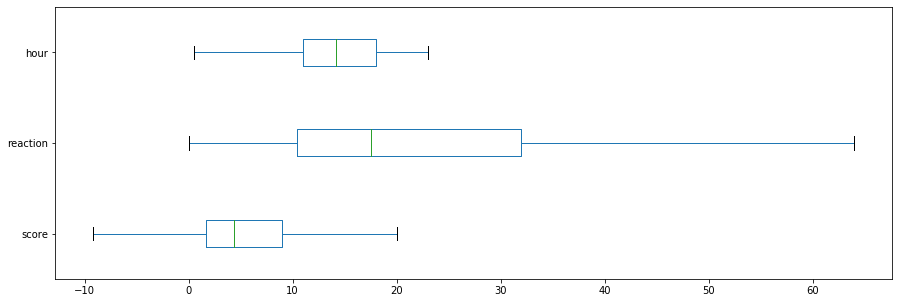

In [17]:
plot = groupbyUsermMean[['score','reaction', 'hour']].plot.box(figsize=(15,5), vert=False, showfliers=False)

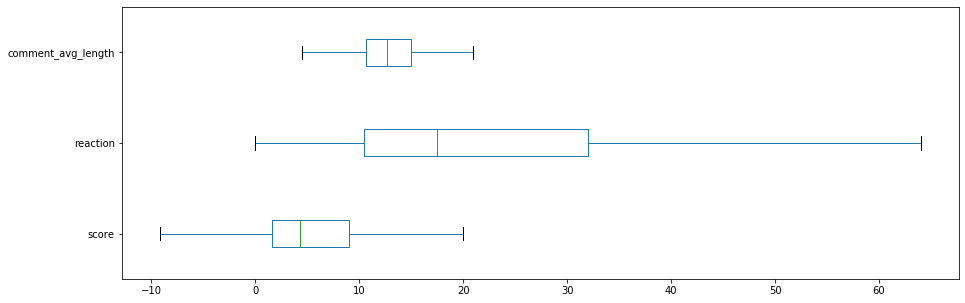

In [18]:
plot = groupbyUsermMean[['score','reaction', 'comment_avg_length']].plot.box(figsize=(15,5), vert=False, showfliers=False)

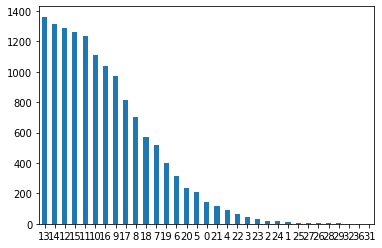

In [19]:
# 平均單則留言字數在 10 字左右
df['comment_avg_length'].value_counts().plot(kind="bar", rot=0)

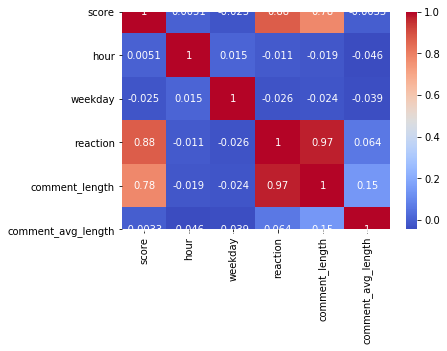

In [20]:
import seaborn as sns
%matplotlib inline

sns.heatmap(df.corr(), cmap='coolwarm', annot=True)